##Autoencorder: 
In this assignment, you will learn how to use generative model for


    - Reconstructing image
    
    - Denoising image
    
    - Generating image
    

##What are autoencoders?

An autoencoder consists of an encoder and decoder, which are both a neural network. They act as compression and decompression functions. In this first part of excercice, you will try to learn an autoencoder that can recontruct an image (in MNIST dataset) of size 28x28 after to be compressed using only 28 or 32 numbers.


![Autoencoder](https://s3.amazonaws.com/book.keras.io/img/ch8/autoencoder.jpg)

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()



In [53]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


Let's build the simplest possible autoencoder (with Dense layers in Keras)

In [0]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32

# this is our input placeholder
input_img = Input(shape=(x_train.shape[1],))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim,activation="relu")(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(x_train.shape[1],activation="sigmoid")(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [56]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.3583 - val_loss: 0.2707
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2632 - val_loss: 0.2523
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2427 - val_loss: 0.2304
Epoch 4/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2222 - val_loss: 0.2118
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2064 - val_loss: 0.1987
Epoch 6/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1954 - val_loss: 0.1895
Epoch 7/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1872 - val_loss: 0.1820
Epoch 8/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1802 - val_loss: 0.1756
Epoch 9/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1741 - val_loss: 0.1698
Epoch

You can note that the input and output of autoencoder are the same.

You can now define your encoder and decoder.

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

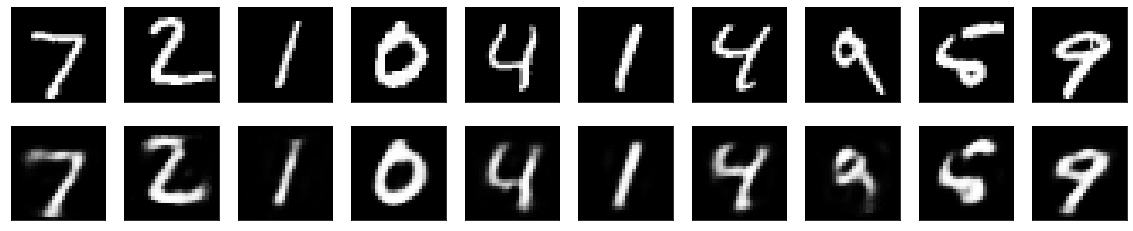

In [60]:
# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Then please try to build a Deep Autoencoders:

  - with more "Dense" layers
  
  - Deep Convolutional Autoencoders
  
  
  

In [0]:
# this is the size of our encoded representations
encoding_dim = 32

# this is our input placeholder
input_img = Input(shape=(x_train.shape[1],))
# "encoded" is the encoded representation of the input
encoded1=Dense(392, activation="relu")(input_img)
encoded2=Dense(196, activation="relu")(encoded1)
encoded3=Dense(98, activation="relu")(encoded2)
encoded=Dense(encoding_dim)(encoded3)
# "decoded" is the lossy reconstruction of the input
decoded1=Dense(98, activation="relu")(encoded)
decoded2=Dense(196, activation="relu")(decoded1)
decoded3=Dense(392, activation="relu")(decoded2)
decoded= Dense(x_train.shape[1], activation="sigmoid")(decoded3)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [63]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.3193 - val_loss: 0.2565
Epoch 2/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2506 - val_loss: 0.2441
Epoch 3/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2326 - val_loss: 0.2256
Epoch 4/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.2147 - val_loss: 0.2060
Epoch 5/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2000 - val_loss: 0.1921
Epoch 6/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1884 - val_loss: 0.1812
Epoch 7/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1789 - val_loss: 0.1726
Epoch 8/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1710 - val_loss: 0.1691
Epoch 9/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1646 - val_loss: 0.1608
Epoch

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

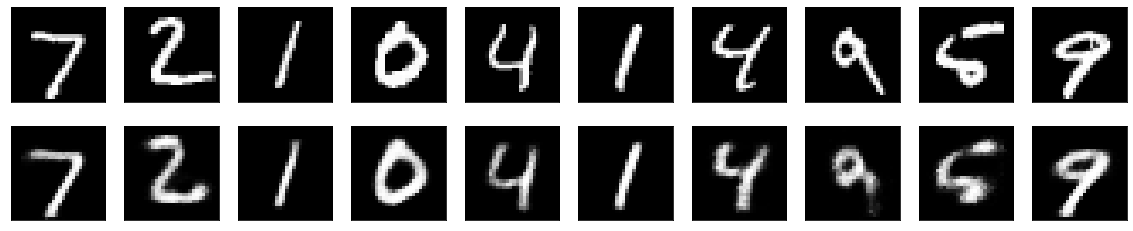

In [66]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##Applications to image denoising


Let's put your autoencoder to work on an image denoising problem. It's simple: we will train the autoencoder to map noisy digits images to clean digits images.

You will generate synthetic noisy digits: you just apply a gaussian noise matrix and clip the images between 0 and 1.


In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
# x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5 # TO BE DEFINED
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)  # TO BE DEFINED

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
Now, please build an autoencoder (you may need more filters than in the last one) and try to denoise the images.

In [0]:
##TODO
# this is the size of our encoded representations
encoding_dim = 32

# this is our input placeholder
input_img = Input(shape=(x_train.shape[1],))
# "encoded" is the encoded representation of the input
dropout=Dropout(0.5)(input_img)
encoded1=Dense(392, activation="relu")(dropout)
encoded2=Dense(196, activation="relu")(encoded1)
encoded3=Dense(98, activation="relu")(encoded2)
encoded=Dense(encoding_dim)(encoded3)
# "decoded" is the lossy reconstruction of the input
decoded1=Dense(98, activation="relu")(encoded)
decoded2=Dense(196, activation="relu")(decoded1)
decoded3=Dense(392, activation="relu")(decoded2)
decoded= Dense(x_train.shape[1], activation="sigmoid")(decoded3)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [85]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1544 - val_loss: 0.1318
Epoch 2/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1542 - val_loss: 0.1329
Epoch 3/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1537 - val_loss: 0.1329
Epoch 4/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1538 - val_loss: 0.1321
Epoch 5/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1538 - val_loss: 0.1322
Epoch 6/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1535 - val_loss: 0.1302
Epoch 7/50
60000/60000 [==============================] - 4s 58us/step - loss: 0.1532 - val_loss: 0.1318
Epoch 8/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1529 - val_loss: 0.1303
Epoch 9/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1530 - val_loss: 0.1332
Epoch

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

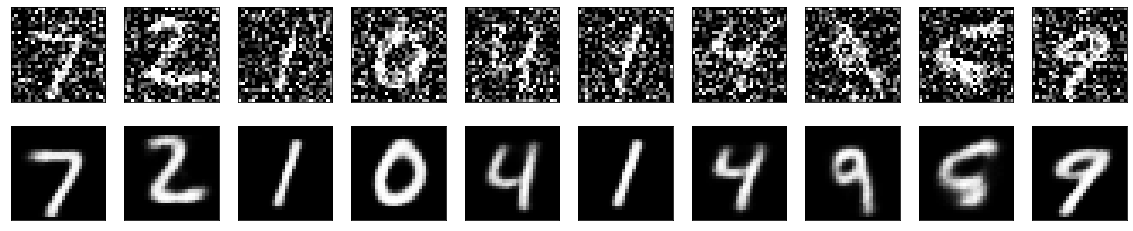

In [89]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Our autoencoder appears to be pretty efficient at denoising images!